In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=True)
y = y.astype(int)
xtrain, xtest, ytrain, ytest = X.iloc[:10_000], X.iloc[10_000:12_000], y.iloc[:10_000], y.iloc[10_000:12_000]

xtrain_pos = xtrain.iloc[ytrain.values == 5]
ytrain_pos = pd.Series(np.ones((xtrain_pos.shape[0])))

xtrain_neg = xtrain.iloc[ytrain.values == 3]
ytrain_neg = pd.Series(-1 * np.ones((xtrain_neg.shape[0])))

xtest_pos = xtest.iloc[ytest.values == 5]
ytest_pos = pd.Series(np.ones((xtest_pos.shape[0])))

xtest_neg = xtest.iloc[ytest.values == 3]
ytest_neg = pd.Series(-1 * np.ones((xtest_neg.shape[0])))

xtrain = pd.concat((xtrain_pos, xtrain_neg), axis=0, ignore_index=True)
ytrain = pd.concat((ytrain_pos, ytrain_neg), axis=0, ignore_index=True)

xtest = pd.concat((xtest_pos, xtest_neg), axis=0, ignore_index=True)
ytest = pd.concat((ytest_pos, ytest_neg), axis=0, ignore_index=True)

In [3]:
perc = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, alpha=0)
perc.fit(xtrain, ytrain)

Perceptron(alpha=0, eta0=1, max_iter=100, random_state=42)

In [28]:
xtrain[ytrain == 1].shape

(863, 784)

In [29]:
xtrain[ytrain == -1].shape

(1032, 784)

In [4]:
y_pred = perc.predict(xtest)

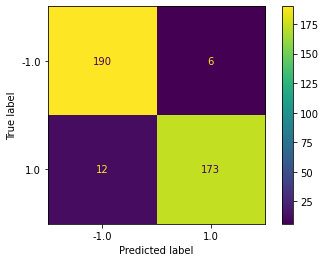

In [5]:
metrics.plot_confusion_matrix(perc, xtest, ytest)

In [38]:
perc2 = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=False, alpha=0)
perc2.fit(xtrain, ytrain)

Perceptron(alpha=0, eta0=1, max_iter=100, random_state=42, shuffle=False)

In [41]:
print(metrics.classification_report(ytest, perc.predict(xtest)))

              precision    recall  f1-score   support

        -1.0       0.94      0.97      0.95       196
         1.0       0.97      0.94      0.95       185

    accuracy                           0.95       381
   macro avg       0.95      0.95      0.95       381
weighted avg       0.95      0.95      0.95       381



In [42]:
print(metrics.classification_report(ytest, perc2.predict(xtest)))

              precision    recall  f1-score   support

        -1.0       0.53      1.00      0.70       196
         1.0       1.00      0.07      0.13       185

    accuracy                           0.55       381
   macro avg       0.77      0.54      0.41       381
weighted avg       0.76      0.55      0.42       381



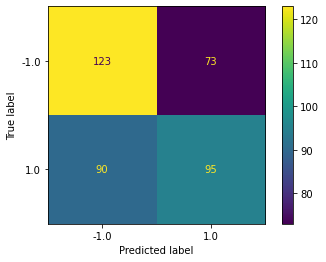

In [7]:
pca = PCA(n_components=10, random_state=1)
x_red_tr = pca.fit_transform(xtrain)
perc = Perceptron(random_state=42, eta0=1, shuffle=True, alpha=0)
perc.fit(x_red_tr, ytrain)

x_red_ts = pca.fit_transform(xtest)

metrics.plot_confusion_matrix(perc, x_red_ts, ytest)



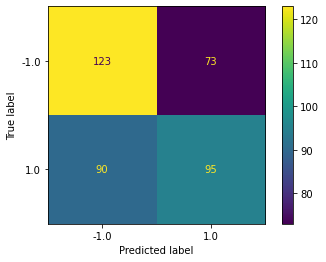

In [47]:
pca = PCA(n_components=10, random_state=1)
x_red_tr = pca.fit_transform(xtrain)
perc = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, alpha=0)
perc.fit(x_red_tr, ytrain)

x_red_ts = pca.fit_transform(xtest)

metrics.plot_confusion_matrix(perc, x_red_ts, ytest)

In [49]:
print(metrics.classification_report(ytest, perc.predict(x_red_ts)))

              precision    recall  f1-score   support

        -1.0       0.58      0.63      0.60       196
         1.0       0.57      0.51      0.54       185

    accuracy                           0.57       381
   macro avg       0.57      0.57      0.57       381
weighted avg       0.57      0.57      0.57       381

